In [2]:
import csv
import json

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
# Load Data
titles = []
poems = []

with open('PoetryFoundationData.csv', encoding='utf8') as data_raw:
	data_csv = csv.reader(data_raw)
	for row in data_csv:
		if (row[0] == ''): # Skip empty rows
			continue
		poem = row[2]
		poem = poem.replace('\n', '').replace('  ', ' ') # Clean whitespace
		poems.append(poem)

In [4]:
# Clean Data
poems_data = poems[:200]

# Tokenize Data
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(poems_data) # Create dictionary

total_words = len(tokenizer.word_index) + 1

# Sequence Data (Only use for small datasets)
sequence_data = []
for poem in poems_data:
	sequence = tokenizer.texts_to_sequences([poem])[0] # Convert to sequence
	for i in range(1, min(len(sequence), 80)): # Create pairs out of sequence
		n_gram_sequence = sequence[:i+1]
		sequence_data.append(n_gram_sequence)

# Pad Data
max_length = max(len(x) for x in sequence_data)
sequence_data = pad_sequences(sequence_data, maxlen=max_length, padding='pre')

In [5]:
max_length

80

In [13]:
open("tokens.json", "w").write(tokenizer.to_json())

876741

In [9]:
# Split Data
data, labels = sequence_data[:,:-1], sequence_data[:,-1] # Split into data and labels
labels = ku.to_categorical(labels, num_classes=total_words) # Convert to one-hot encoding

In [10]:
# Build Model
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_length-1))
model.add(Bidirectional(LSTM(192, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train Model
history = model.fit(data, labels, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 325ms/step - loss: 4.9743 - accuracy: 0.0542
Epoch 2/100
7/7 [==============================] - 2s 294ms/step - loss: 4.8293 - accuracy: 0.0896
Epoch 3/100
7/7 [==============================] - 2s 298ms/step - loss: 4.7104 - accuracy: 0.0833
Epoch 4/100
7/7 [==============================] - 2s 308ms/step - loss: 4.6001 - accuracy: 0.1038
Epoch 5/100
7/7 [==============================] - 2s 299ms/step - loss: 4.5027 - accuracy: 0.1172
Epoch 6/100
7/7 [==============================] - 2s 312ms/step - loss: 4.4704 - accuracy: 0.0807
Epoch 7/100
7/7 [==============================] - 2s 309ms/step - loss: 4.2798 - accuracy: 0.1018
Epoch 8/100
7/7 [==============================] - 2s 308ms/step - loss: 4.1432 - accuracy: 0.1166
Epoch 9/100
7/7 [==============================] - 2s 316ms/step - loss: 4.0826 - accuracy: 0.1222
Epoch 10/100
7/7 [==============================] - 2s 307ms/step - loss: 4.0263 - accuracy: 0.1113
Epoch 11/

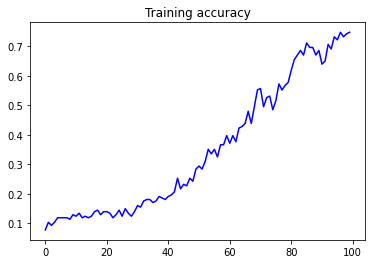

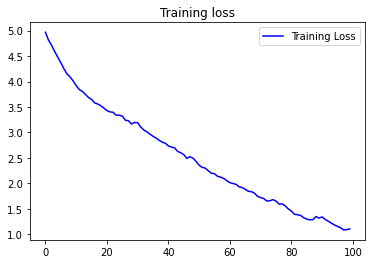

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [12]:
# Predict Outcome
message = 'The rivers'
size = 100

for _ in range(size):
	sequence = tokenizer.texts_to_sequences([message])[0]
	sequence = pad_sequences([sequence], maxlen=max_length-1, padding='pre')
	prediction = model.predict_classes(sequence)
	index = prediction[0]
	message += ' ' + tokenizer.index_word[index]

c:\Users\tharl\.conda\envs\ml\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [13]:
message

'The rivers cupola glinted the clouds shoneamong fir fir trees him him an hourfor the half half mile all the hill trailed the trailed the village trailed the village passed him greeted him him him greeted him him him against greeted him against fences against fences against fences against fences against fences against fences against fences against he stick he sculpted he yearned for the day when the road nowit above the road nowit nowit above the moon saints in frescoesmeet the eye and only the rain has started to cutthrough the shingles on the roof of his emptyhouse the apple trees'